**Machine Learning algorithms for PTB dataset:**

**About the dataset**

Data Source: Physionet's PTB Diagnostic Database

Number of Samples: 14552

Sampling Frequency: 125Hz

Number of Categories: 2


```
Class	Description

0     Normal heartbeat

1     Abnormal heartbeat
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# path to dataset

normal_df = pd.read_csv("/content/drive/MyDrive/ECG Heartbeat Categorization Dataset/ptbdb_normal.csv", header = None)
abnormal_df = pd.read_csv("/content/drive/MyDrive/ECG Heartbeat Categorization Dataset/ptbdb_abnormal.csv", header = None)

In [ ]:
normal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
abnormal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
print(normal_df.shape)
print(abnormal_df.shape)

(4046, 188)
(10506, 188)


In [ ]:
# check the value of each class

print ("\nPTB Normal classes: \n", normal_df[187].value_counts())
print ("\nPTB Abnormal classes: \n", abnormal_df[187].value_counts())


PTB Normal classes: 
 0.0    4046
Name: 187, dtype: int64

PTB Abnormal classes: 
 1.0    10506
Name: 187, dtype: int64


In [ ]:
# define the type of heartbeat for each class

ptb_type = {0. : 'Normal',
               1. : 'Abnormal'}

In [ ]:
df = pd.concat([normal_df, abnormal_df], axis=0).reset_index()

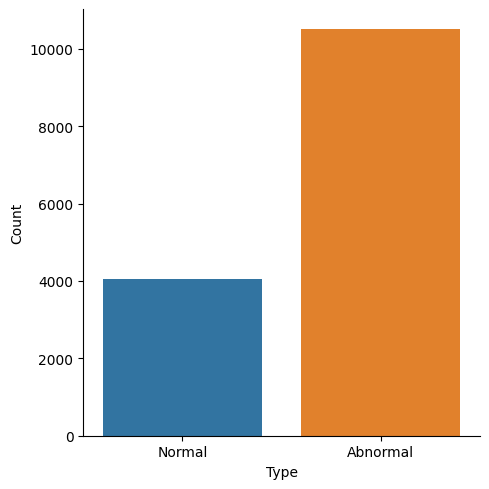

In [ ]:
# display counts of each class

g = sns.catplot(data=df, x=187, kind="count")
g.set_axis_labels("Type", "Count")
g.set_xticklabels(["Normal", "Abnormal"])

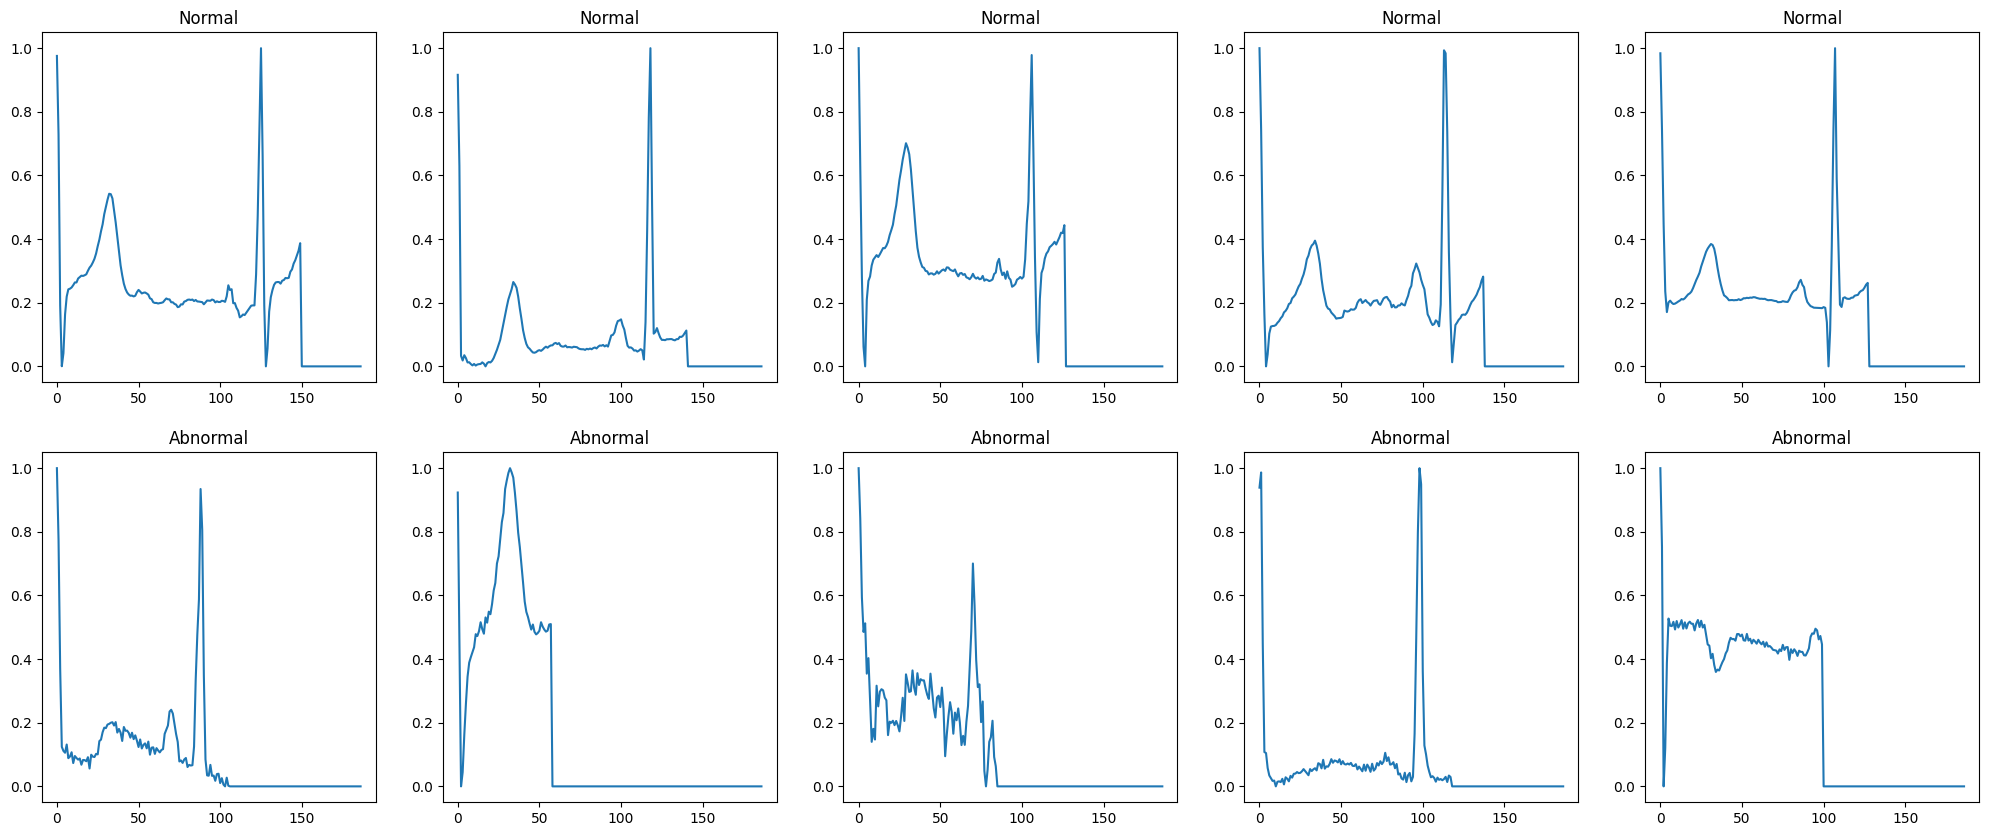

In [ ]:
# randomly sampling five data from each class

rnd_normal = np.random.randint(0,normal_df.shape[0],size=(5,))
rnd_abnormal = np.random.randint(0,abnormal_df.shape[0], size=(5,))

# plot the ECG

plt.figure(figsize=(25,10))
np_count = np.linspace(0,186,187)
np_time = np.tile(np_count,(10,1))

for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    if (i < 5):

        # normal beat

        ax.plot(normal_df.iloc[rnd_normal[i],np_time[i,:]])
        ax.set_title(ptb_type[normal_df.loc[rnd_normal[i],187]])
    else:

        # abnormal beat

        ax.plot(abnormal_df.iloc[rnd_abnormal[i-5],np_time[i,:]])
        ax.set_title(ptb_type[abnormal_df.loc[rnd_abnormal[i-5],187]])

plt.show()

Concatenate the abnormal data with the normal one

In [ ]:
all_heart_data = pd.concat([abnormal_df, normal_df], axis=0, ignore_index=True)
# all_heart_data = all_heart_data.sample(frac=1, random_state=0) # shuffle the data
print(all_heart_data.info())
all_heart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
None


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Make sure that we have only two classes

In [ ]:
all_heart_data.loc[:,187].value_counts()

1.0    10506
0.0     4046
Name: 187, dtype: int64

Split the data into X and y | train and test

In [ ]:
X = all_heart_data.loc[:,:186]
y = all_heart_data.loc[:,187]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

**Train a model using LogisticRegression**

In [ ]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

In [ ]:
predicted_point = log_model.predict([X_test.iloc[0,:]])
print('Predict value using the LogisticRegression model: ', end='')
print(predicted_point)
print('The true value: ',end='')
print(y_test.iloc[0])

Predict value using the LogisticRegression model: [1.]
The true value: 0.0


In [ ]:
print(f'The accuracy of the LogisticRegression model on train data = {log_model.score(X_train, y_train)*100:.3}%')

The accuracy of the LogisticRegression model on train data = 83.3%


In [ ]:
print(f'The accuracy of the LogisticRegression model on test data = {log_model.score(X_test, y_test)*100:.3}%')

The accuracy of the LogisticRegression model on test data = 82.2%


In [ ]:
# Fit the Logistic Regression model on the training data
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

# Predict on the test data
y_pred = log_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.64      1216
         1.0       0.85      0.92      0.88      3150

    accuracy                           0.82      4366
   macro avg       0.79      0.75      0.76      4366
weighted avg       0.81      0.82      0.82      4366



**Train a model using DecisionTreeClassifier**

In [ ]:
dec_tree_model = DecisionTreeClassifier(random_state=0)
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
predicted = dec_tree_model.predict([X_test.iloc[0,:]])
print('predict value using the DecisionTreeClassifier model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the DecisionTreeClassifier model: [0.]
The true value: 0.0


In [ ]:
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(X_train,y_train)*100:.5}%')

The accuracy of the DecisionTreeClassifier model on train data = 100.0%


In [ ]:
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(X_test,y_test)*100:.3}%')

The accuracy of the DecisionTreeClassifier model on train data = 92.1%


In [ ]:
# Fit the Decision Tree Classifier model on the training data
dec_tree_model = DecisionTreeClassifier(random_state=0)
dec_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dec_tree_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1216
         1.0       0.95      0.94      0.95      3150

    accuracy                           0.92      4366
   macro avg       0.90      0.90      0.90      4366
weighted avg       0.92      0.92      0.92      4366



**Train a model using KNeighborsClassifier**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predicted = knn_model.predict([X_test.iloc[0,:]])
print('predict value using the knn model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the knn model: [0.]
The true value: 0.0


In [ ]:
print(f'The accuracy of the knn model on train data = {knn_model.score(X_train,y_train)*100:.3}%')

The accuracy of the knn model on train data = 95.7%


In [ ]:
print(f'The accuracy of the knn model on test data = {knn_model.score(X_test,y_test)*100:.3}%')

The accuracy of the knn model on test data = 92.2%


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1216
         1.0       0.96      0.93      0.95      3150

    accuracy                           0.92      4366
   macro avg       0.90      0.91      0.90      4366
weighted avg       0.92      0.92      0.92      4366



**Train a model using RandomForestClassifier**

In [ ]:
rand_model = RandomForestClassifier()
rand_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predicted = rand_model.predict([X_test.iloc[0,:]])
print('predict value using the RandomForestClassifier model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the RandomForestClassifier model: [0.]
The true value: 0.0


In [ ]:
print(f'The accuracy of the RandomForestClassifier model on train data = {rand_model.score(X_train,y_train)*100:.5}%')

The accuracy of the RandomForestClassifier model on train data = 100.0%


In [ ]:
print(f'The accuracy of the RandomForestClassifier model on test data = {rand_model.score(X_test,y_test)*100:.3}%')

The accuracy of the RandomForestClassifier model on test data = 96.9%


In [ ]:
# Fit the RandomForestClassifier model on the training data
rand_model = RandomForestClassifier()
rand_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rand_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      1216
         1.0       0.97      0.99      0.98      3150

    accuracy                           0.97      4366
   macro avg       0.97      0.95      0.96      4366
weighted avg       0.97      0.97      0.97      4366



**Train a model using Gaussian NB**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print(f'The accuracy of the Gaussian NB model on train data = {gnb.score(X_train,y_train)*100:.5}%')

The accuracy of the Gaussian NB model on train data = 59.876%


In [ ]:
print(f'The accuracy of the Gaussian NB model on test data = {gnb.score(X_test,y_test)*100:.3}%')

The accuracy of the Gaussian NB model on test data = 61.1%


In [ ]:
# Predict on the test data
y_pred = gnb.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.84      0.54      1216
         1.0       0.89      0.52      0.66      3150

    accuracy                           0.61      4366
   macro avg       0.65      0.68      0.60      4366
weighted avg       0.76      0.61      0.63      4366



**Train a model using Linear SVM**

In [ ]:
lsvm = LinearSVC(random_state=0, tol=1e-5)
lsvm.fit(X_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [ ]:
y_pred = lsvm.predict(X_test)

In [ ]:
print(f'The accuracy of the Linear SVM model on train data = {lsvm.score(X_train,y_train)*100:.5}%')

The accuracy of the Linear SVM model on train data = 83.615%


In [ ]:
print(f'The accuracy of the Linear SVM model on test data = {lsvm.score(X_test,y_test)*100:.3}%')

The accuracy of the Linear SVM model on test data = 82.2%


In [ ]:
# Print the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65      1216
         1.0       0.85      0.91      0.88      3150

    accuracy                           0.82      4366
   macro avg       0.79      0.75      0.77      4366
weighted avg       0.82      0.82      0.82      4366



**Train a model using SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(kernel='rbf', class_weight='balanced')

param_grid = {'C': [1, 5, 10]}
grid_svc = GridSearchCV(svc, param_grid, verbose=2, scoring='f1_micro')
grid_svc.fit(X_train, y_train)

# Print the parameters which yield the best model performance
print(grid_svc.best_estimator_)

# Use the best estimator to make predictions on the test data
best_svc = grid_svc.best_estimator_
pred_svc = best_svc.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................................C=1; total time=   4.7s
[CV] END ................................................C=1; total time=   6.0s
[CV] END ................................................C=1; total time=   5.4s
[CV] END ................................................C=1; total time=   5.6s
[CV] END ................................................C=1; total time=   5.6s
[CV] END ................................................C=5; total time=   3.9s
[CV] END ................................................C=5; total time=   4.4s
[CV] END ................................................C=5; total time=   4.3s
[CV] END ................................................C=5; total time=   4.3s
[CV] END ................................................C=5; total time=   5.3s
[CV] END ...............................................C=10; total time=   3.8s
[CV] END ........................................

In [ ]:
# Get train data accuracy
train_accuracy = best_svc.score(X_train, y_train)

# Get test data accuracy
test_accuracy = best_svc.score(X_test, y_test)

print("Train data accuracy:", train_accuracy)
print("Test data accuracy:", test_accuracy)

Train data accuracy: 0.9609267622226586
Test data accuracy: 0.9448007329363262


In [ ]:
# Print the classification report
report = classification_report(y_test, pred_svc)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1216
         1.0       0.98      0.94      0.96      3150

    accuracy                           0.94      4366
   macro avg       0.92      0.95      0.93      4366
weighted avg       0.95      0.94      0.95      4366

